In [1]:
import numpy as np
import matplotlib.pyplot as plt

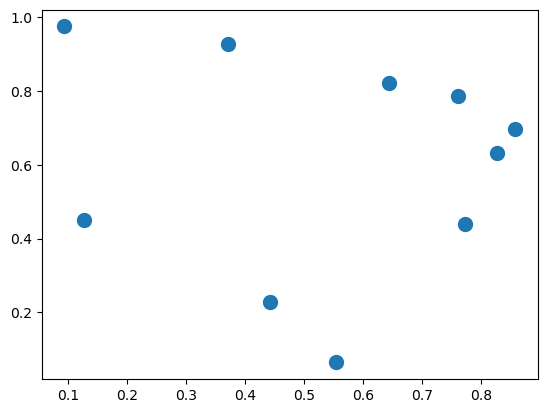

In [3]:
# creating data
rng = np.random.default_rng(seed=42)
data = rng.random((10,2)) 

# data visualization 
plt.scatter(data[:, 0], data[:, 1], s=100)

In [5]:
print(data)

[[0.77395605 0.43887844]
 [0.85859792 0.69736803]
 [0.09417735 0.97562235]
 [0.7611397  0.78606431]
 [0.12811363 0.45038594]
 [0.37079802 0.92676499]
 [0.64386512 0.82276161]
 [0.4434142  0.22723872]
 [0.55458479 0.06381726]
 [0.82763117 0.6316644 ]]


In [7]:
# for each pair of points I calculate the difference of their coordinates
differences = data[:, np.newaxis] - data[np.newaxis, :]

# square the coordinates
sq_differences = differences ** 2

# sum the differences of the coordinates to determine the squares of the distances
dist_squared = sq_differences.sum(-1)

print(dist_squared.diagonal())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# in the far left columns of the matrix are the indexes of the nearest neighbors
nearest = np.argsort(dist_squared, axis=1)
print(nearest)

[[0 9 1 3 7 6 8 5 4 2]
 [1 9 3 6 0 5 7 8 4 2]
 [2 5 4 6 3 9 1 7 0 8]
 [3 6 1 9 0 5 7 2 4 8]
 [4 7 2 5 8 6 0 3 9 1]
 [5 2 6 3 4 1 9 0 7 8]
 [6 3 1 9 5 0 2 7 4 8]
 [7 8 4 0 9 1 6 3 5 2]
 [8 7 0 4 9 1 3 6 5 2]
 [9 1 3 0 6 5 7 8 4 2]]


In [11]:
# finding the nearest neighbor for k equal to 2
k = 2
nearest_partition = np.argpartition(dist_squared, k + 1, axis=1)
print(nearest_partition)

[[0 9 1 3 7 5 6 8 4 2]
 [1 9 3 6 0 5 2 7 8 4]
 [2 5 4 6 3 9 1 7 8 0]
 [6 3 1 9 0 5 2 7 8 4]
 [7 2 4 5 8 6 0 1 3 9]
 [5 2 6 3 1 4 9 7 8 0]
 [3 6 1 9 5 0 2 7 8 4]
 [7 4 8 0 1 5 6 3 2 9]
 [7 0 8 4 1 5 6 3 2 9]
 [3 9 1 0 2 5 6 7 8 4]]


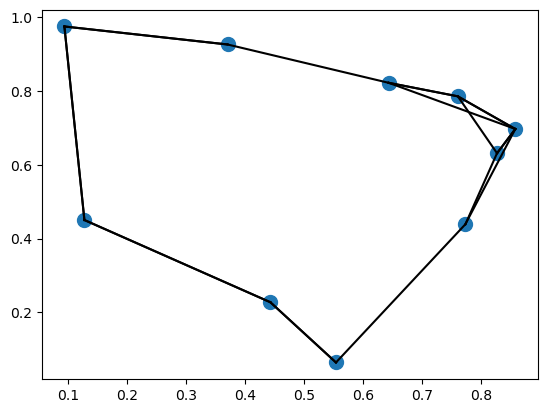

In [13]:
# visualisation of 2 nearest neighbors
plt.scatter(data[:, 0], data[:, 1], s=100)

K = 2
for i in range(data.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(data[j], data[i]), color='black')